# Importations et directories

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
INPUT_DIR = "./data/fifa20_data.csv"

# Analyse et pré-processing des données

## Introduction à Fifa

Il s'agit du jeu de sport le plus populaire et nous nous posons la question suivante: est-il possible de créer des profils de footballers à partir de leurs statistiques générales, et de les mettre en relation avec d'autres données telles que leur poste, leur note globale ou encore leur note potentielle?

Dans Fifa, chaque joueur possède une carte avec sa description:

- Statistiques générales (Dribble, tirs etc...)
- Poste
- Note générale

Le détail des différentes statistiques générales est également accessible: accélération, positionnement etc...

Voici un résumé en image:

![Mon image](img_fifa.PNG)

## Exploration de nos données

### Analyse descriptive

La base de données semble beaucoup trop grande et contient des variables pas interessantes:

In [3]:
data = pd.read_csv(INPUT_DIR)
data.head(50)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


Nous enlevons dans un premier temps toutes les variables inutiles (ex: photo, salaire etc...), toutes les variables qui témoignent du collectif (car nous voulons étudier des performances individuelles), ainsi que les variables compliquées à étudier (ex: LS, RS etc... sont les performances des joueurs à chaque poste).

In [4]:
drop_cols = ['Unnamed: 0','ID', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Work Rate']
drop_cols2 = ['Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause']
drop_cols3 = ['LS', 'RS', 'ST', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
data = data.drop(drop_cols+drop_cols2+drop_cols3, axis=1)

Les gardiens étant des joueurs très particuliers, nous n'allons pas les étudier.

In [5]:
drop_cols_GK = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
data = data.drop(drop_cols_GK, axis=1)
data = data.drop(data[data['Position'] == 'GK'].index)
data.shape

(16182, 35)

In [6]:
data.isna().sum()

Name                0
Age                 0
Overall             0
Potential           0
Skill Moves        48
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

48 joueurs ne possèdent pas d'informations sur leurs statistiques: nous pouvons les enlever. De même pour certains joueurs qui n'ont pas d'information sur leur poste.

In [7]:
data = data.dropna()
data.shape

(16122, 35)

In [8]:
data.head(20)

,Name,Age,Overall,Potential,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,L. Messi,31,94,94,4.0,RF,84.0,95.0,70.0,90.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,Cristiano Ronaldo,33,94,94,5.0,ST,84.0,94.0,89.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,Neymar Jr,26,92,93,5.0,LW,79.0,87.0,62.0,84.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,K. De Bruyne,27,91,92,4.0,RCM,93.0,82.0,55.0,92.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,E. Hazard,27,91,91,4.0,LF,81.0,84.0,61.0,89.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,L. Modrić,32,91,91,4.0,RCM,86.0,72.0,55.0,93.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,L. Suárez,31,91,91,3.0,RS,77.0,93.0,77.0,82.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,Sergio Ramos,32,91,91,3.0,RCB,66.0,60.0,91.0,78.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,R. Lewandowski,29,90,90,4.0,ST,62.0,91.0,85.0,83.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,T. Kroos,28,90,90,3.0,LCM,88.0,76.0,54.0,92.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 0 to 18206
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16122 non-null  object 
 1   Age              16122 non-null  int64  
 2   Overall          16122 non-null  int64  
 3   Potential        16122 non-null  int64  
 4   Skill Moves      16122 non-null  float64
 5   Position         16122 non-null  object 
 6   Crossing         16122 non-null  float64
 7   Finishing        16122 non-null  float64
 8   HeadingAccuracy  16122 non-null  float64
 9   ShortPassing     16122 non-null  float64
 10  Volleys          16122 non-null  float64
 11  Dribbling        16122 non-null  float64
 12  Curve            16122 non-null  float64
 13  FKAccuracy       16122 non-null  float64
 14  LongPassing      16122 non-null  float64
 15  BallControl      16122 non-null  float64
 16  Acceleration     16122 non-null  float64
 17  SprintSpeed 

In [10]:
data.describe()

,Age,Overall,Potential,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,25.005272,66.461233,71.515631,2.532502,54.195013,49.762250,57.065190,62.642724,46.745069,60.590125,...,51.441508,59.581938,50.426994,54.823533,55.468986,52.131001,60.350391,51.313050,51.917256,49.634723
std,4.547106,6.794631,6.074413,0.617823,14.128841,16.377475,11.605909,9.785086,14.781959,12.511927,...,15.729601,14.446229,18.798222,14.675196,12.912500,12.510791,10.148784,17.217843,19.171370,19.169624
min,16.000000,46.000000,48.000000,2.000000,11.000000,10.000000,15.000000,20.000000,10.000000,14.000000,...,11.000000,13.000000,10.000000,11.000000,12.000000,12.000000,22.000000,10.000000,10.000000,10.000000
25%,21.000000,62.000000,67.000000,2.000000,44.000000,36.000000,49.000000,57.000000,35.000000,55.000000,...,40.000000,50.000000,34.000000,46.000000,47.000000,42.000000,53.000000,37.000000,35.000000,32.000000
50%,25.000000,66.000000,71.000000,2.000000,56.000000,52.000000,58.000000,64.000000,47.000000,63.000000,...,54.000000,61.000000,56.000000,57.000000,57.000000,52.000000,61.000000,56.000000,59.000000,56.000000
75%,28.000000,71.000000,75.000000,3.000000,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,...,64.000000,70.000000,65.000000,65.000000,65.000000,62.000000,68.000000,65.000000,67.000000,65.000000
max,41.000000,94.000000,95.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


### Analyse approfondie

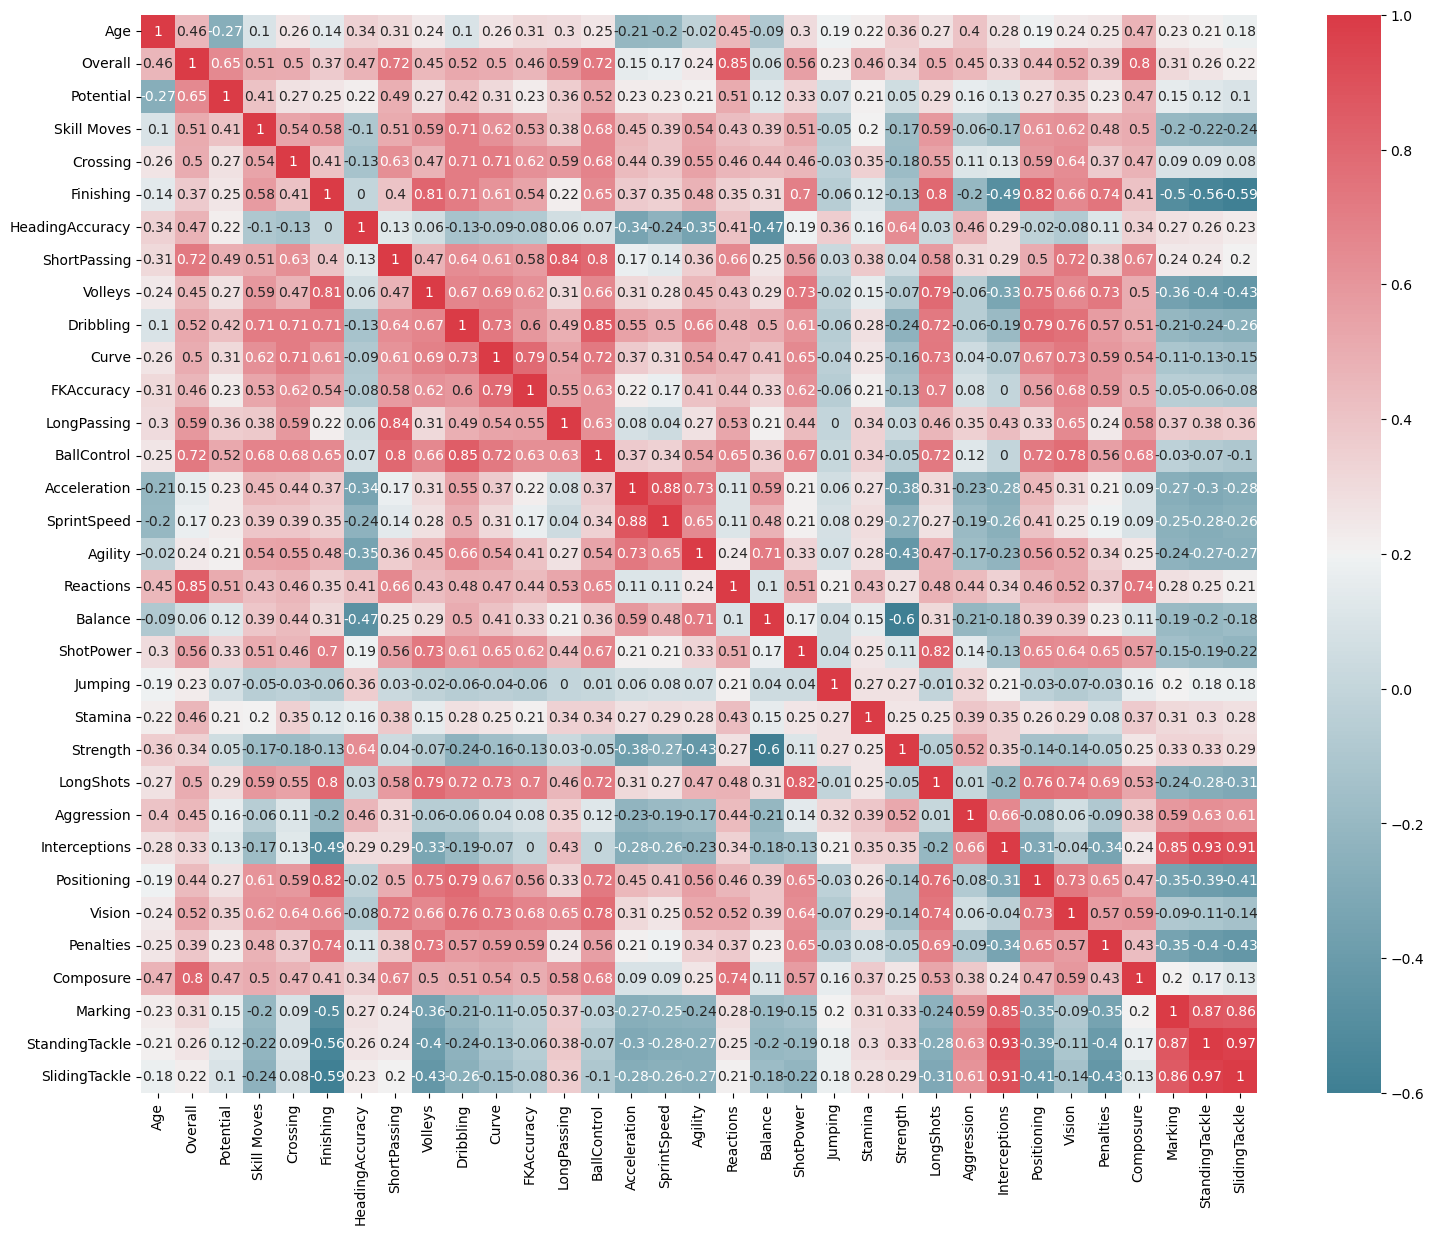

In [11]:
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(round(data.corr(),2), cmap=cmap, annot=True)
plt.show()

Les variables StandingTackle (tacle debout), SlidingTackle (tacle glissé) et Interceptions sont très corrélées. Ainsi, on peut décider d'en enlever 2 sur les 3:

In [12]:
drop_cols = ['SlidingTackle', 'StandingTackle']
data = data.drop(drop_cols, axis=1)

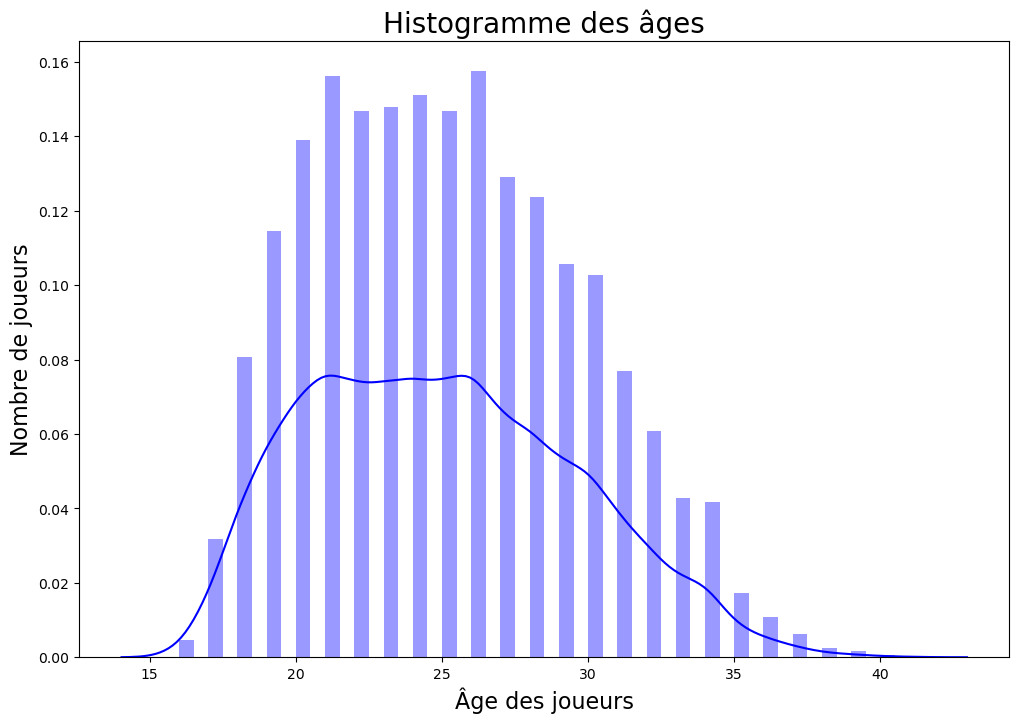

In [13]:
df_age = data.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(df_age, bins = 50, color='b')
ax.set_xlabel(xlabel="Âge des joueurs", fontsize=16)
ax.set_ylabel(ylabel='Nombre de joueurs', fontsize=16)
ax.set_title(label='Histogramme des âges', fontsize=20)
plt.show()

In [14]:
data_players = data.loc[:50,]

fig = px.scatter(data_players, x="Finishing",y="ShotPower",color="Name",text="Name",title="Finishing Vs ShotPower")
fig.update_traces(textposition='top center')
fig.show()

Text(0.5, 1.0, 'Nombre de joueurs')

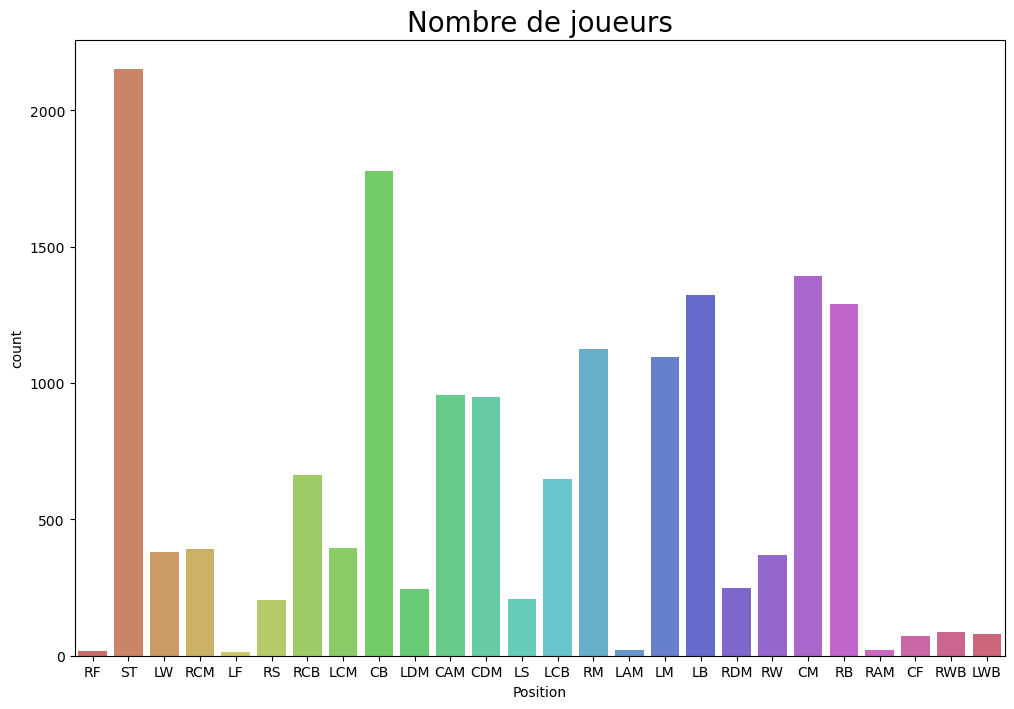

In [15]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = 'Position', data = data, palette = 'hls')
ax.set_title(label='Nombre de joueurs', fontsize=20)

Voici une dataframe avec les meilleurs joueurs à chaque poste:

In [16]:
best_players = data.loc[data.groupby('Position')['Overall'].idxmax()][['Name', 'Position']]
best_players

,Name,Position
17,A. Griezmann,CAM
12,D. Godín,CB
20,Sergio Busquets,CDM
271,Luis Alberto,CF
67,Thiago,CM
28,J. Rodríguez,LAM
35,Marcelo,LB
24,G. Chiellini,LCB
11,T. Kroos,LCM
14,N. Kanté,LDM


La dataframe suivante permet de mettre en valeur les statistiques les plus importantes pour chaque poste:

In [17]:
data2 = data.loc[:, ~data.columns.isin(["Overall", "Potential"])]
for i, val in data2.groupby('Position').mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))
print("\n")

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, Aggression
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, Aggression
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Stamina, ShortPassing, Aggression
Position RF: Agility, Acceleration, Balance
Position RM: Acceleration, SprintSpeed, A

Text(0.5, 1.0, 'Relation entre dribble et duel remporté et comparaison avec la finition')

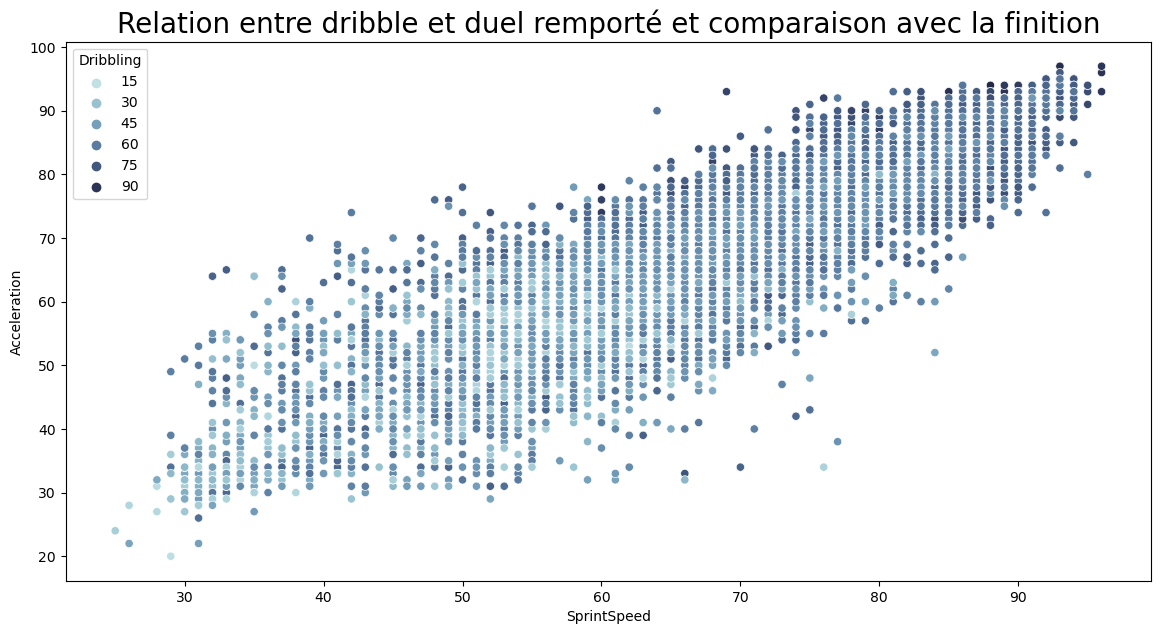

In [18]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='SprintSpeed', y='Acceleration',
                     hue='Dribbling',
                     palette=cmap, sizes=(1, 1),
                     data=data)
ax.set_title(label='Relation entre dribble et duel remporté et comparaison avec la finition', fontsize=20)

Il semblerait que les joueurs les plus rapides soient ceux avec la meilleure accélération. Les joueurs bons dribbleurs sont généralement parmi les plus rapides et ayant une bonne accélération.

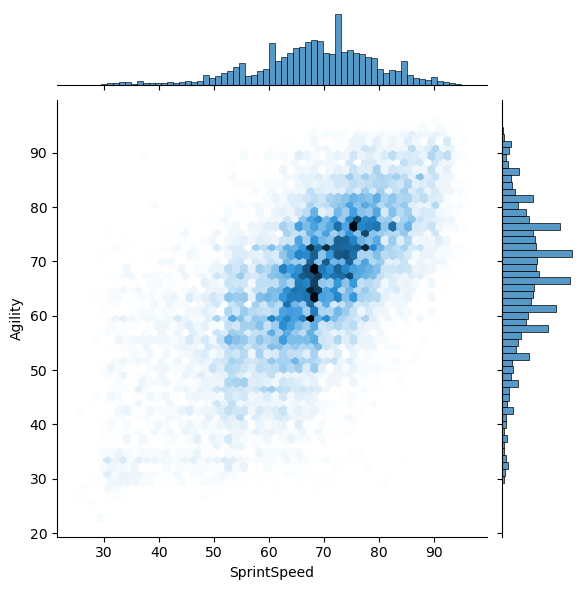

In [19]:
sns.jointplot(x=data['SprintSpeed'], y=data['Agility'], kind = "hex")

## Construction de notre jeu de données final

### Nos données d'entraînements classiques

In [20]:
X = data.loc[:, ~data.columns.isin(["Overall", "Potential", "Position"])]
y = data[["Overall", "Potential", "Position"]]
X.head()

,Name,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking
0,L. Messi,31,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0
1,Cristiano Ronaldo,33,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0
2,Neymar Jr,26,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0
4,K. De Bruyne,27,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0
5,E. Hazard,27,4.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,...,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0


In [21]:
y.head()

,Overall,Potential,Position
0,94,94,RF
1,94,94,ST
2,92,93,LW
4,91,92,RCM
5,91,91,LF


Il nous reste donc deux bases de données:
- X contenant le nom de chaque joueur et les statistiques individuelles associées
- y contenant des variables qui ne doivent pas être prises en compte dans le clustering mais qui seront intéressantes pour l'interprétation

L'âge est gardé parmi nos variables explicatives en tant qu'indicateur de l'expérience du joueur.

In [22]:
X_without_names = X.iloc[:, 1:]

### Réduction de dimension

In [23]:
X_scaled = (X_without_names - X_without_names.mean()) / X_without_names.std()

In [24]:
pca = PCA()
X_pca_1 = pca.fit_transform(X_scaled)

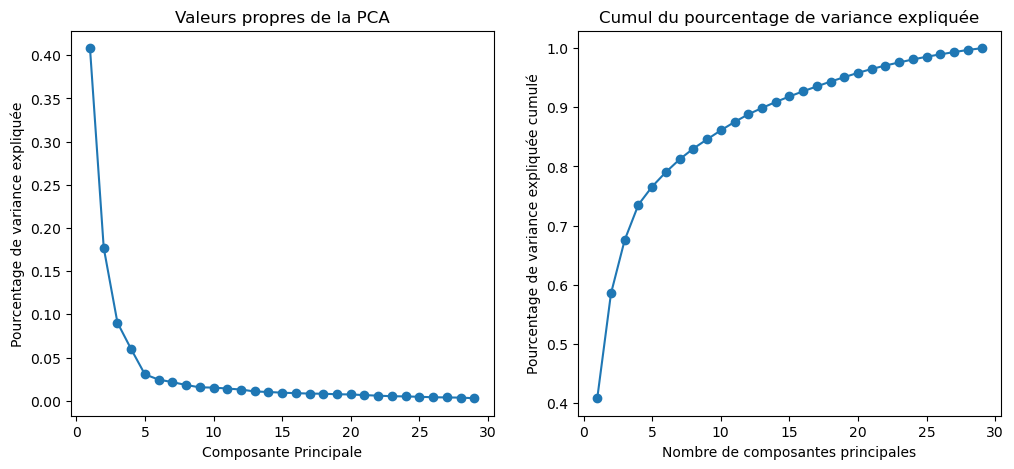

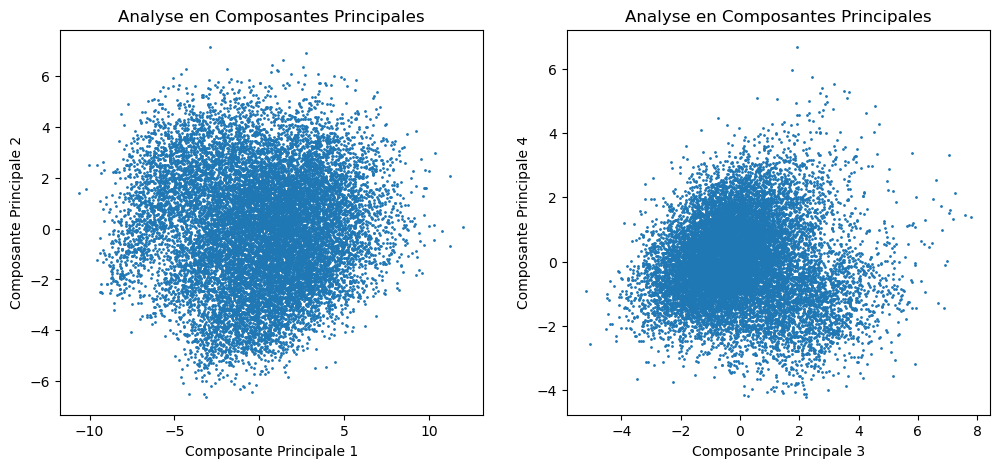

In [25]:
df_pca = pd.DataFrame({'x': X_pca_1[:, 0], 'y': X_pca_1[:, 1]})
df_pca_2 = pd.DataFrame({'x': X_pca_1[:, 2], 'y': X_pca_1[:, 3]})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# graphique des valeurs propres
ax1.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
ax1.set_xlabel('Composante Principale')
ax1.set_ylabel('Pourcentage de variance expliquée')
ax1.set_title('Valeurs propres de la PCA')

# graphique du cumul du pourcentage de variance expliquée
ax2.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax2.set_xlabel('Nombre de composantes principales')
ax2.set_ylabel('Pourcentage de variance expliquée cumulé')
ax2.set_title('Cumul du pourcentage de variance expliquée')

plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#pca 1
ax1.scatter(df_pca['x'], df_pca['y'], s=1)
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.set_title('Analyse en Composantes Principales')

#pca 2
ax2.scatter(df_pca_2['x'], df_pca_2['y'], s=1)
ax2.set_xlabel('Composante Principale 3')
ax2.set_ylabel('Composante Principale 4')
ax2.set_title('Analyse en Composantes Principales')

plt.show()

Les quatre premières composantes principales expliquent ensemble plus de 70% de la variance totale dans les données. Nous devons donc considérer les 4 premières composantes principales:

In [26]:
X_pca = pd.DataFrame(X_pca_1[:,:4])
X_pca

,0,1,2,3
0,12.018327,0.065329,0.514925,-0.203746
1,11.246639,2.076037,1.899129,-3.776264
2,11.259867,-0.676797,-0.292550,-0.505797
3,10.367903,2.990152,-0.467255,0.728544
4,10.742610,-0.090724,-0.502298,-0.348594
...,...,...,...,...
16117,-5.032788,-2.976185,0.064325,2.179144
16118,-6.964086,-2.931682,4.057250,1.506061
16119,-4.943893,-5.017070,1.318005,0.026508
16120,-4.539014,-5.535918,1.886931,2.103693


À partir de maintenant, nous allons appliquer des modèles de clustering que nous allons entraîner avec deux jeux de données possibles: X_without_names, notre jeu classique, et X_pca, notre jeu de donnée réduit.

# Clustering

## K-means

### Modèles

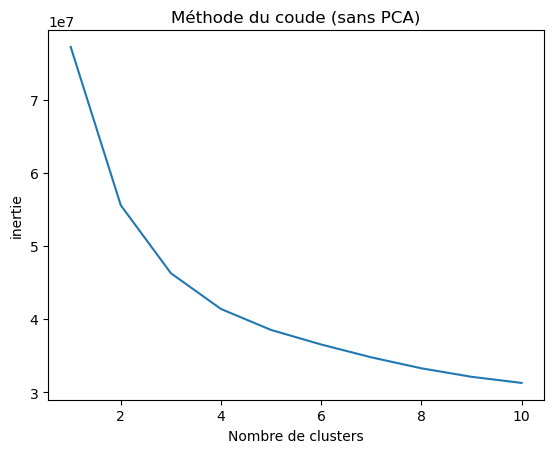

In [27]:
inertie=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X_without_names)
    inertie.append(kmeans.inertia_)     
plt.plot(range(1,11), inertie,)
plt.title('Méthode du coude (sans PCA)')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.show() 


Nous pouvons choisir un nombre de clusters égal à 4.

In [28]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0, n_init=10)
y_kmeans= kmeansmodel.fit_predict(X_without_names)
labels = kmeansmodel.labels_

clusters = pd.DataFrame()
clusters["kmean"] = labels

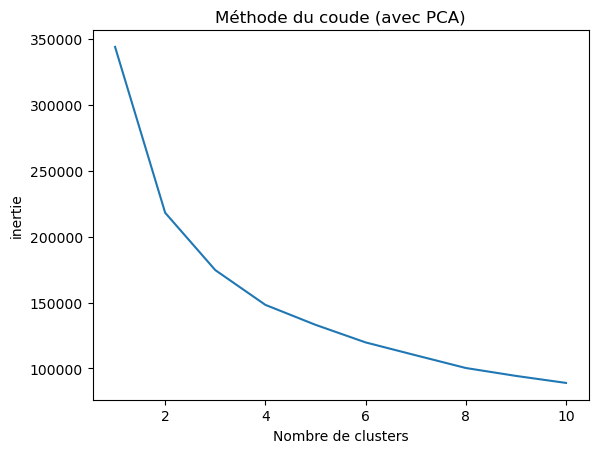

In [29]:
inertie=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X_pca)
    inertie.append(kmeans.inertia_)     
plt.plot(range(1,11), inertie,)
plt.title('Méthode du coude (avec PCA)')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.show() 

On remarque que les valeurs d'inertie sont beaucoup plus raisonnables avec des données réduites qu'avec les données non-réduites. La distance entre chaque point et le centre de son cluster est donc diminuée avec la PCA. Dans ce cas aussi nous garderons un nombre de clusters égal à 4.

In [30]:
kmeansmodel = KMeans(n_clusters=4 , init='k-means++', random_state=0, n_init=10)
y_kmeans= kmeansmodel.fit_predict(X_pca)
labels = kmeansmodel.labels_

clusters["kmean_pca"] = labels

### Analyse

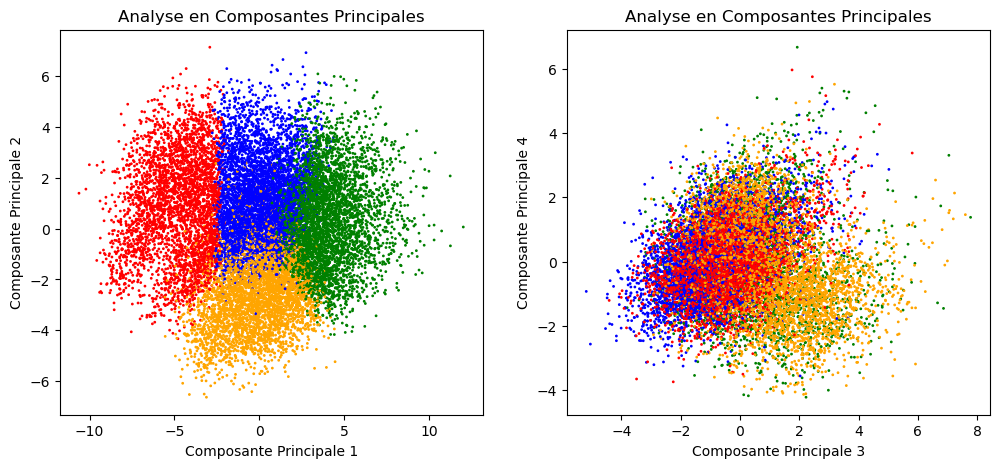

In [31]:
#sans réduction de dimension dans les données

labels = clusters["kmean"]
df_pca = pd.DataFrame({'x': X_pca_1[:, 0], 'y': X_pca_1[:, 1], 'label': labels})
df_pca_2 = pd.DataFrame({'x': X_pca_1[:, 2], 'y': X_pca_1[:, 3], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#pca 1
ax1.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.set_title('Analyse en Composantes Principales')

#pca 2
ax2.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax2.set_xlabel('Composante Principale 3')
ax2.set_ylabel('Composante Principale 4')
ax2.set_title('Analyse en Composantes Principales')
plt.show()

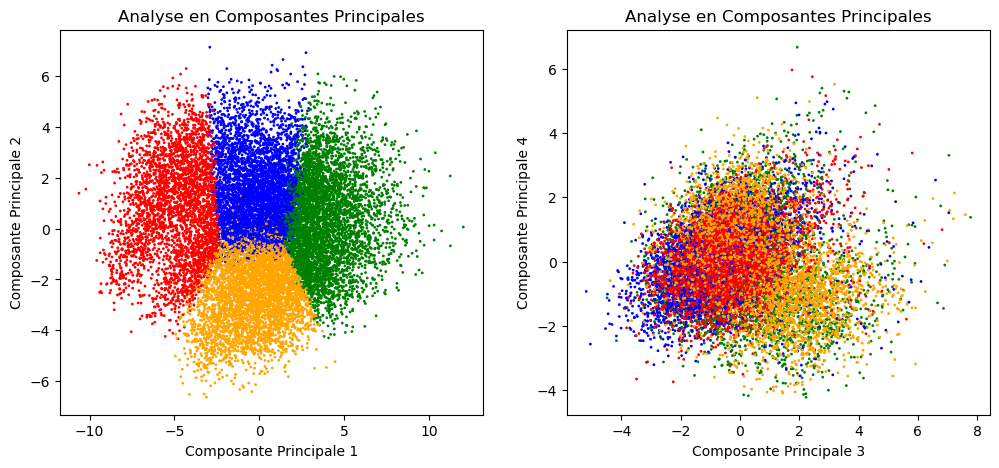

In [32]:
#avec réduction de dimension dans les données

labels = clusters["kmean_pca"]
df_pca = pd.DataFrame({'x': X_pca_1[:, 0], 'y': X_pca_1[:, 1], 'label': labels})
df_pca_2 = pd.DataFrame({'x': X_pca_1[:, 2], 'y': X_pca_1[:, 3], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
#pca 1
ax1.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.set_title('Analyse en Composantes Principales')

#pca 2
ax2.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax2.set_xlabel('Composante Principale 3')
ax2.set_ylabel('Composante Principale 4')
ax2.set_title('Analyse en Composantes Principales')
plt.show()

On remarque que le clustering après PCA est plus "propre" que le clustering sans PCA: les délimitations entre les clusters au sein de des graphes de PCA sont plus nettes.
De manière générale, il est préférable de réduire les dimensions lorsqu'on a beaucoup de variable comme dans notre cas.

Grâce au code suivant, nous pouvons voir quels sont les statistiques les plus importantes dans chaque cluster:

In [33]:
# Calcul des moyennes de chaque variable pour chaque cluster
cluster_means = []
for i in range(4):
    cluster_indices = np.where(clusters["kmean_pca"] == i)
    cluster_data = X_without_names.iloc[cluster_indices]
    variable_means = np.mean(cluster_data, axis=0)[np.argsort(np.mean(cluster_data, axis=0))]
    cluster_means.append(variable_means)

# Trouver les variables ayant les moyennes les plus élevées dans chaque cluster
for i in range(4):
    print(f"Variables importantes pour le cluster {i}:")
    top_variables = cluster_means[i][::-1][:4]
    print(top_variables)

Variables importantes pour le cluster 0:
Strength      70.932536
Jumping       67.059184
Stamina       62.584483
Aggression    62.268629
dtype: float64
Variables importantes pour le cluster 1:
Stamina       72.562066
Strength      70.103803
Jumping       69.010763
Aggression    68.508252
dtype: float64
Variables importantes pour le cluster 2:
Agility         74.485595
Acceleration    73.193534
BallControl     72.965252
SprintSpeed     72.508907
dtype: float64
Variables importantes pour le cluster 3:
Acceleration    71.622550
SprintSpeed     71.306073
Balance         69.382773
Agility         69.067989
dtype: float64


Au niveau des statistiques fortes, le cluster 0 et 1 se ressemblent beaucoup, tout comme le cluster 2 et 3.

In [34]:
positions = y['Position'].unique()
positions

array(['RF', 'ST', 'LW', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB', 'LDM',
       'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

Il est plus naturel de ranger les postes dans l'ordre suivant, avec les défenseurs à gauche, les milieux au milieu et les attaquants à droite:

In [35]:
positions = np.array(["CB", "LB", "RB", "RCB", "LCB", "RWB", "LWB", "RDM", "LDM", "CDM", "CM", "RCM", "LCM", "LAM", "RAM", "LM", "RM", "CAM", "RF", "LF", "RS", "LS", "LW", "RW", "CF", "ST"])

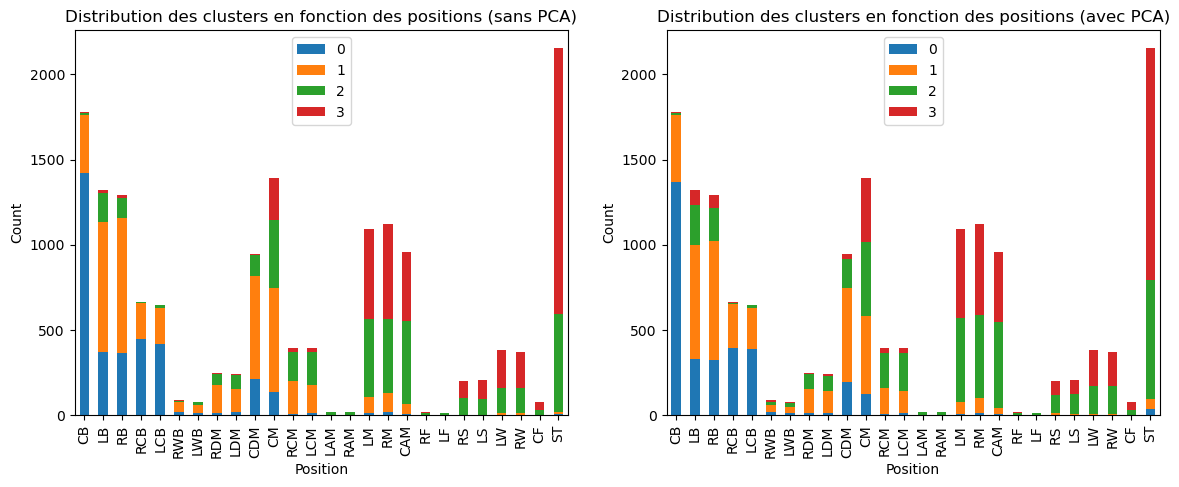

In [36]:
freq_matrix = pd.DataFrame(index=positions, columns=range(4))
freq_matrix_pca = pd.DataFrame(index=positions, columns=range(4))

for i in range(4):
    freq_table = pd.crosstab(y[np.array(clusters['kmean']) == i]['Position'], columns='count')
    freq_table = freq_table.reindex(positions)
    freq_matrix[i] = freq_table.values

    freq_table_pca = pd.crosstab(y[np.array(clusters['kmean_pca']) == i]['Position'], columns='count')
    freq_table_pca = freq_table_pca.reindex(positions)
    freq_matrix_pca[i] = freq_table_pca.values

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

freq_matrix.plot(kind='bar', stacked=True, ax=ax1)
freq_matrix_pca.plot(kind='bar', stacked=True, ax=ax2)

ax1.set_xlabel('Position')
ax1.set_ylabel('Count')
ax1.set_title('Distribution des clusters en fonction des positions (sans PCA)')

ax2.set_xlabel('Position')
ax2.set_ylabel('Count')
ax2.set_title('Distribution des clusters en fonction des positions (avec PCA)')

plt.show()

La PCA ne semble pas modifier énormément nos clusters, et on s'en rend compte avec le plot ci-dessus. Nous allons garder les données réduites pour le reste de nos analyses. 

De plus, on se rend compte qu'il y a quelques dépendances entre les postes des joueurs et les clusters associés. Les défenseurs centraux (CB - Central back en anglais) par exemple sont principalement du cluster 0, et les buteurs (ST - Striker en anglais) sont principalement du cluster 3 voire 2. Ceci semble logique car d'après l'ouput précédent, les joueurs du cluster 0 ont comme meilleurs statistiques la force, le saut et l'endurance, ce qui correspond aux qualités que doivent avoir les défenseurs. De même, les joueurs du cluster 3 ont pour principales qualités l'accéleration et le sprint, ce qui correspond également aux qualités d'un attaquant.

On avait déjà remarqué que les clusters 0 et 1 se ressemblaient, tout comme les clusters 2 et 3, et ce plot nous le confirme encore: les postes défensifs semblent majoritairement associés aux clusters 0 et 1, et les postes offensifs semblent associés aux clusters 2 et 3. On voit d'ailleurs un gradient de couleur bleu-orange se décaler vers le rouge-vert à mesure que nous nous déplaçons vers la droite (c'est-à-dire depuis les défenseurs vers les attaquants). Les postes intermédiaires tels que milieu central (CM - Central middle en anglais) semblent contenir les 4 clusters de façon équilibrée.

Le clustering semble donc assez bien fonctionner car, sans l'information des postes, il a réussi à associer chaque joueur à un cluster qui définit à peu près bien le poste général du joueur (attaquant, milieu ou défenseur).

Pour pouvoir comparer les clusters en fonction des notes globales des joueurs (Overall), nous allons attribuer à chaque joueur une note de niveau. Il y aura 4 niveaux: 0, 1, 2 et 3. Les niveaux sont attribués de sorte à ce qu'on ait le même nombre de joueurs par niveau. 

In [37]:
def map_valeur(overall):
    if 46 <= overall <= 62:
        return 0
    elif 62 < overall <= 66:
        return 1
    elif 66 < overall <= 71:
        return 2
    elif 71 < overall <= 94:
        return 3
    else:
        return overall

y["Level"] = y["Overall"].apply(lambda x: map_valeur(x))

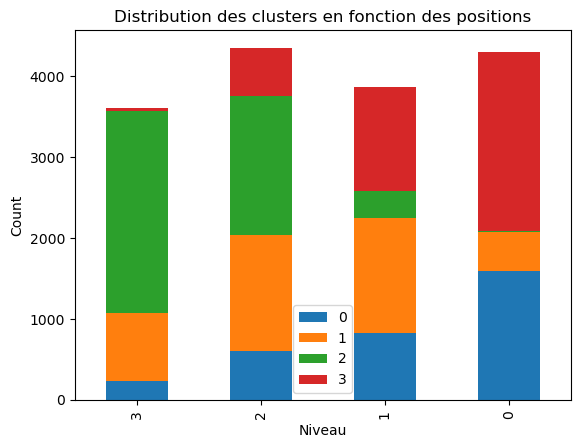

In [38]:
niveaux = y['Level'].unique()
freq_matrix = pd.DataFrame(index=niveaux, columns=range(4))
for i in range(4):
    freq_table = pd.crosstab(y[np.array(clusters["kmean_pca"]) == i]['Level'], columns='count')
    freq_table = freq_table.reindex(niveaux)
    freq_matrix[i] = freq_table.values
freq_matrix.plot(kind='bar', stacked=True)
plt.xlabel('Niveau')
plt.ylabel('Count')
plt.title('Distribution des clusters en fonction des positions')
plt.show()

On remarque 3 gradients:
- un gradient positif de cluster 0 depuis les hautes notes générales (niveau = 3) vers les faibles notes (niveau = 0).
- un gradient négatif de cluster 2 depuis les hautes notes générales vers les faibles notes.
- un gradient positif de cluster 3 depuis les hautes notes générales vers les faibles notes.

Le cluster 1 semble présent de manière assez homogène à tous les niveaux.

En combinant les informations, les 4 clusters peuvent être interprétés de la manière suivante:

- cluster 0: les moins bons défenseurs (car plus présents au niveau 0 qu'aux meilleurs niveaux)
- cluster 1: les autres défenseurs (on ne peut pas dire qu'ils soient meilleurs car la part de cluster 1 est présente à peu près équitablement à tous les niveaux)
- cluster 2: les meilleurs attaquants (cluster 2 plutôt présent aux meilleurs niveaux)
- cluster 3: les moins bons attaquants (cluster 2 plutôt présent aux niveaux plus faibles)

In [39]:
attaquants = ["L. Messi", "Cristiano Ronaldo", "L. Suárez"]
defenseurs = ["M. Hummels", "D. Godín", "G. Chiellini"]

X_temp = X.copy()
X_temp["cluster"] = clusters["kmean_pca"]

clusters_meilleurs_attaquants = []
clusters_meilleurs_defenseurs = []

for attaq in attaquants:
    clusters_meilleurs_attaquants.append(X_temp.loc[X_temp['Name'] == attaq, 'cluster'].values[0])
    
for defens in defenseurs:
    clusters_meilleurs_defenseurs.append(X_temp.loc[X_temp['Name'] == defens, 'cluster'].values[0])

print(clusters_meilleurs_attaquants)
print(clusters_meilleurs_defenseurs)

[2.0, 2.0, 2.0]
[2.0, 2.0, 2.0]


On se rend compte que les meilleurs attaquants et les meilleurs défenseurs (les plus connus) sont tous associés au cluster 2. Cela fait sens par rapport à ce qu'on a dit juste avant pour les attaquants et le cluster 2, mais cela est moins compréhensible pour les défenseurs qui sont aussi cluster 2.

En connaissant le jeu, je sais qu'il va être compliqué de trouver une vraie explication à l'attriubtion des clusters en fonction des statistiques. En effet, les joueurs les plus connus ont des bonnes statistiques globalement partout dans le jeu Fifa. Leurs faiblesses sont prises en compte quand même, mais typiquement un joueur très connu mauvais en tête aura une statistique de tête équivalente à celle d'un joueur de petite division très fort de la tête. Ceci explique le fait que nous retrouvons tous les joueurs les plus connus en cluster 2. Ainsi, la célébrité des joueurs joue énormément sur les statistiques.

In [40]:
n_joueurs = 1000
clusters_joueurs_connus = X_temp['cluster'].iloc[:n_joueurs].tolist()
n_2 = 0
for element in clusters_joueurs_connus:
    if element == 2:
        n_2 += 1

print(f"Part de cluster 2 parmi les {n_joueurs} joueurs les plus célèbres: ", 100*n_2/n_joueurs, "%")

Part de cluster 2 parmi les 1000 joueurs les plus célèbres:  77.5 %


## Classification ascendante hiérarchique (CAH)

### Modèle

In [41]:
CAH = AgglomerativeClustering(n_clusters=4)
CAH.fit(X_pca)
clusters["cah"] = CAH.labels_

### Analyse

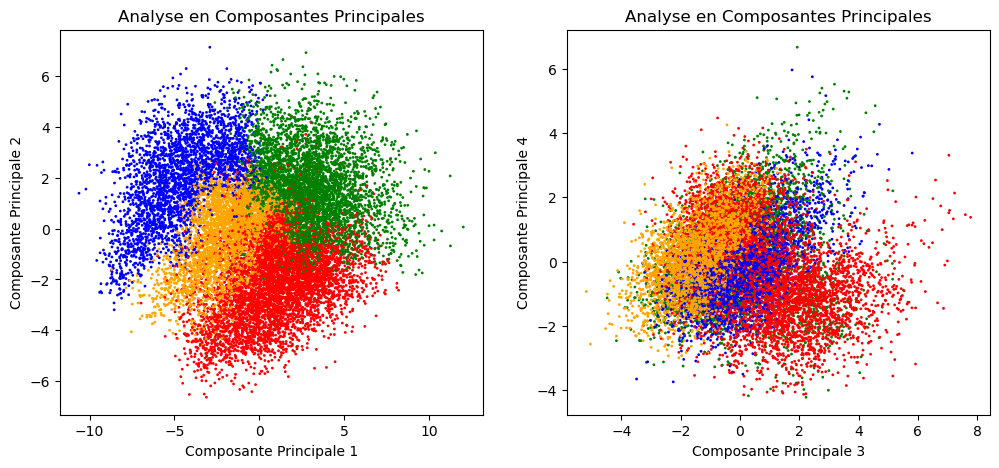

In [42]:
labels = clusters["cah"]
df_pca = pd.DataFrame({'x': X_pca_1[:, 0], 'y': X_pca_1[:, 1], 'label': labels})
df_pca_2 = pd.DataFrame({'x': X_pca_1[:, 2], 'y': X_pca_1[:, 3], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#pca 1
ax1.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.set_title('Analyse en Composantes Principales')

#pca 2
ax2.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax2.set_xlabel('Composante Principale 3')
ax2.set_ylabel('Composante Principale 4')
ax2.set_title('Analyse en Composantes Principales')
plt.show()

Le partitionnement des clusters est différent et semble moins "droit" que dans le modèle kmeans. En effet, le modèle kmeans avec ou sans ACP montre un découpage des clusters très linéaire lorsqu'on représente les données sur l'ACP. Ici, les clusters semblent épouser plus logiquement les formes des nuages de points. 

De plus, le graphe avec les axes 3 et 4 montre une différence de répartition claire des clusters 0, 1 et 3 (orange, bleu et rouge), alors que dans le clustering k-means les clusters étaient complètement éparpillés.

In [43]:
# Calcul des moyennes de chaque variable pour chaque cluster
cluster_means = []
for i in range(4):
    cluster_indices = np.where(clusters["cah"] == i)
    cluster_data = X_without_names.iloc[cluster_indices]
    variable_means = np.mean(cluster_data, axis=0)[np.argsort(np.mean(cluster_data, axis=0))]
    cluster_means.append(variable_means)

# Trouver les variables ayant les moyennes les plus élevées dans chaque cluster
for i in range(4):
    print(f"Variables importantes pour le cluster {i}:")
    top_variables = cluster_means[i][::-1][:4]
    print(top_variables)

Variables importantes pour le cluster 0:
Acceleration    73.047107
SprintSpeed     72.755999
Agility         71.447777
Balance         70.239414
dtype: float64
Variables importantes pour le cluster 1:
Strength           76.433756
Jumping            69.362579
Aggression         66.869626
HeadingAccuracy    65.224101
dtype: float64
Variables importantes pour le cluster 2:
Stamina         73.867962
BallControl     71.897713
ShortPassing    71.869437
ShotPower       70.446029
dtype: float64
Variables importantes pour le cluster 3:
Acceleration    69.070724
SprintSpeed     68.852916
Balance         68.528036
Stamina         68.156664
dtype: float64


On observe une plus grande diversité des statistiques dominantes entre les clusters. Le cluster 0, au vu des statistiques prédominantes, semble être un cluster d'attaquants.

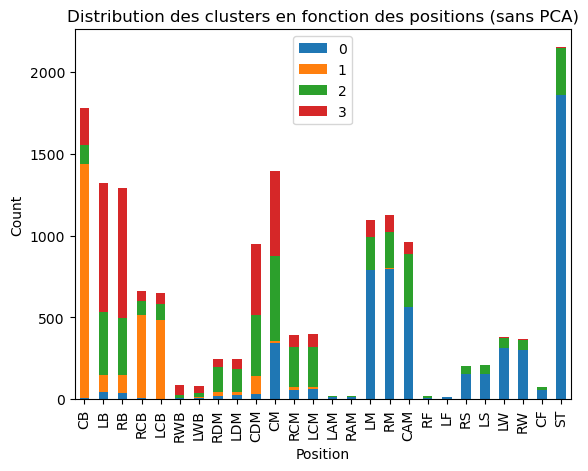

In [48]:
freq_matrix = pd.DataFrame(index=positions, columns=range(4))

for i in range(4):
    freq_table = pd.crosstab(y[np.array(clusters['cah']) == i]['Position'], columns='count')
    freq_table = freq_table.reindex(positions)
    freq_matrix[i] = freq_table.values

freq_matrix.plot(kind='bar', stacked=True)

plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution des clusters en fonction des positions (sans PCA)')

plt.show()

On voit les clusters 1 et 3 présents surtout chez les joueurs défensifs et le cluster 0 est présent chez les attaquants. Cette dernière information confirme ce que nous avons dit précédemment. Le cluster 2 est présent à peu près à tous les postes.

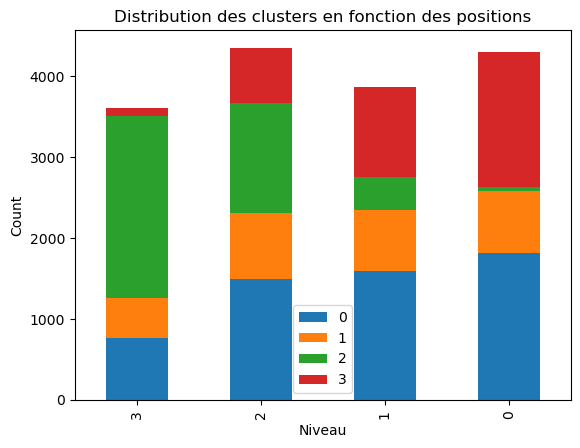

In [50]:
freq_matrix = pd.DataFrame(index=niveaux, columns=range(4))

for i in range(4):
    freq_table = pd.crosstab(y[np.array(clusters["cah"]) == i]['Level'], columns='count')
    freq_table = freq_table.reindex(niveaux)
    freq_matrix[i] = freq_table.values

freq_matrix.plot(kind='bar', stacked=True)

plt.xlabel('Niveau')
plt.ylabel('Count')
plt.title('Distribution des clusters en fonction des positions')
plt.show()

Cette méthode de clustering paraît meilleure car elle semble moins prendre en compte le niveau des joueurs. En effet, je ne sais pas si c'était clair jusqu'à présent, mais nous voulons clusteriser les footballers en fonction de leur similarité sur certaines statistiques et pas sur leur célébrité ou leur niveau global. Un joueur de division 3 allemande bon de la tête et rapide doit pouvoir se retrouver dans le même cluster qu'un joueur comme Cristiano Ronaldo qui possède les mêmes qualités.

## Clustering spectral

Cette technique consiste à transformer les données en un espace spectral, où les vecteurs de données sont représentés comme des vecteurs propres de la matrice de similarité des données. Ensuite, les données sont partitionnées en utilisant un algorithme de clustering classique, tel que le k-means:

### Modèle

In [52]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
labels = spectral.fit_predict(X_without_names)

clusters["spectral"] = labels

En prenant comme paramètre "nearest_neighbors", on décide de tracer le graphe de similarité des données grâce à une méthode de k plus proches voisins. k est un paramètre mis par défaut.

### Analyse

In [53]:
# Évaluer la qualité des clusters avec l'indice de silhouette
silhouette_avg = silhouette_score(X_without_names, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.17400216893651074


Le coefficient de silhouette est une mesure de qualité de clustering qui évalue à la fois la compacité des points d'un cluster et la séparation des clusters. Un coefficient de silhouette élevé indique que les points sont bien regroupés dans leurs clusters respectifs et qu'ils sont séparés les uns des autres. Un coefficient de silhouette faible indique que les points sont mal regroupés, qu'ils sont trop proches les uns des autres ou qu'ils se chevauchent.

Le coefficient de silhouette varie entre -1 et 1. Un coefficient de silhouette de 1 indique une bonne séparation entre les clusters et une forte cohérence à l'intérieur de chaque cluster. Un coefficient de silhouette de 0 indique que les clusters se chevauchent et que les points sont répartis de manière uniforme entre eux. Un coefficient de silhouette négatif indique que les points sont attribués à des clusters incorrects.

Un coefficient de silhouette inférieur à 0,2 comme le notre est considéré comme faible.

In [54]:
db_index = davies_bouldin_score(X_without_names, labels)
print(db_index)

1.5485374164233883


L'indice de Davies-Bouldin calcule la similarité entre les clusters voisins. Un indice de Davies-Bouldin plus petit indique que les clusters sont bien séparés, tandis qu'un indice de Davies-Bouldin plus grand peut indiquer que les clusters se chevauchent ou sont trop similaires.

Notre indice de Davies-Bouldin est au-dessus de 1, ce qui indique une mauvaise qualité de clustering.

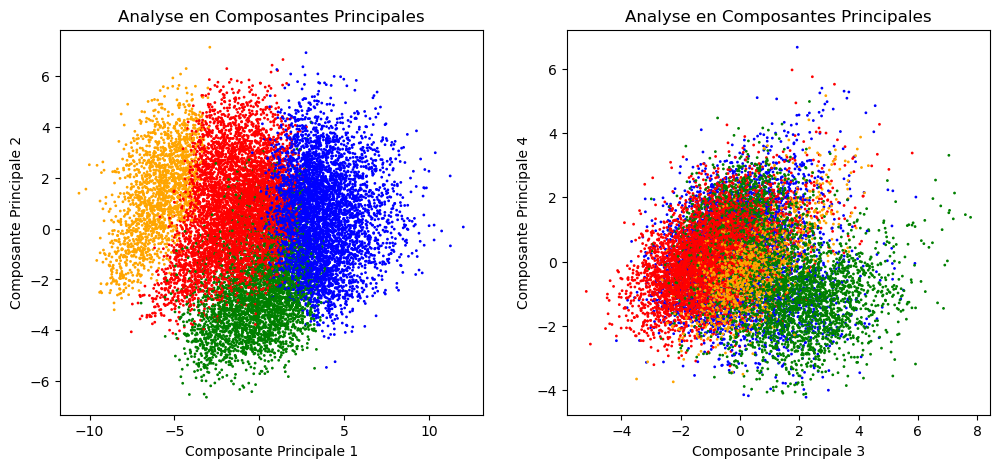

In [55]:
labels = clusters["spectral"]
df_pca = pd.DataFrame({'x': X_pca_1[:, 0], 'y': X_pca_1[:, 1], 'label': labels})
df_pca_2 = pd.DataFrame({'x': X_pca_1[:, 2], 'y': X_pca_1[:, 3], 'label': labels})

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}

df_pca['color'] = [colors[label] for label in np.array(labels)]
df_pca_2['color'] = [colors[label] for label in np.array(labels)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#pca 1
ax1.scatter(df_pca['x'], df_pca['y'], c=df_pca['color'], s=1)
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.set_title('Analyse en Composantes Principales')

#pca 2
ax2.scatter(df_pca_2['x'], df_pca_2['y'], c=df_pca_2['color'], s=1)
ax2.set_xlabel('Composante Principale 3')
ax2.set_ylabel('Composante Principale 4')
ax2.set_title('Analyse en Composantes Principales')
plt.show()

Visuellement, cette méthode de clustering semble être la plus réussie.